# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.078126,0.001817,0.190403,0.061404,0.007878,0.165377,0.088226,0.017174,0.185821
1,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.093678,0.003105,0.205183,0.076908,0.013087,0.173019,0.111019,0.028677,0.198395
2,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0.104668,0.004693,0.208994,0.086760,0.016959,0.174144,0.126067,0.037047,0.199974
3,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.137429,0.008188,0.237980,0.116973,0.027774,0.192602,0.167370,0.059078,0.219705
4,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0.135846,0.008512,0.232139,0.115235,0.028441,0.184376,0.166026,0.060851,0.212002


# Explore best partition per k

In [8]:
_selected_measure = "ARI"
_mean_column, _median_column = "ari_mean", "ari_median"

In [9]:
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_mean_column, ascending=False).head(1))
    .sort_values(_mean_column, ascending=False)[
        ["method", "k", _mean_column, _median_column]
    ]
)
display(_tmp.head(10))

,,method,k,ari_mean,ari_median
k,,,,,
8,301,scc_020,8,0.221259,0.040295
10,362,scc_025,10,0.221141,0.040271
7,300,scc_020,7,0.218083,0.038231
6,299,scc_020,6,0.218068,0.038239
12,305,scc_020,12,0.217015,0.048236
11,304,scc_020,11,0.217009,0.048231
9,302,scc_020,9,0.216682,0.044590
18,311,scc_020,18,0.213489,0.054577
17,310,scc_020,17,0.213258,0.055814


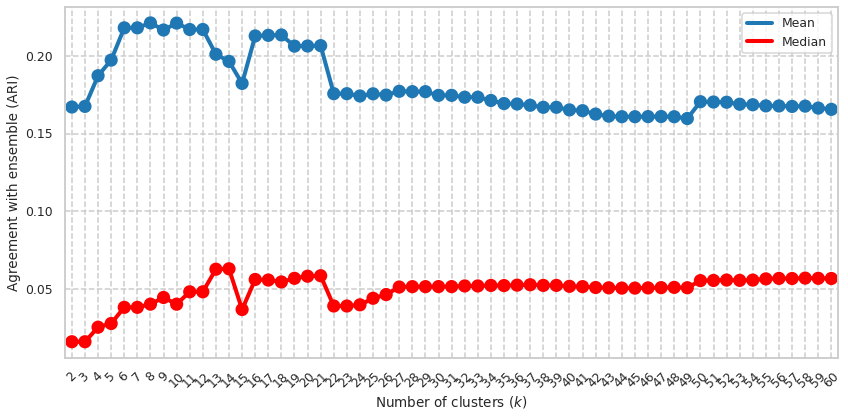

In [10]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_mean_column, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_median_column, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel(f"Agreement with ensemble ({_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

# Select best partition per k

In [11]:
_selected_stat = "Median"
_measure_col = _median_column

In [12]:
best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [13]:
best_parts = best_parts.set_index("k")

In [14]:
best_parts.shape

(59, 3)

In [15]:
# show partitions with top values
best_parts.head(10)

,method,partition,ari_median
k,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920
12,scc_025,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.089870
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616
15,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089346
7,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088937
6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088920
8,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088831


In [16]:
best_parts.sort_values("k")

,method,partition,ari_median
k,,,
2,scc_050,"[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.076657
3,scc_050,"[1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, ...",0.063797
4,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, ...",0.085510
5,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, ...",0.087086
6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088920
7,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088937
8,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088831
9,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088777
10,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088763


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a relative high threshold (75th percentile).

In [17]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    59.000000
mean      0.073919
std       0.013812
min       0.051845
25%       0.057652
50%       0.076657
75%       0.086586
max       0.090117
Name: ari_median, dtype: float64

In [18]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x >= best_threshold)
)

0.08658622143058942

In [19]:
best_parts.shape

(59, 4)

In [20]:
best_parts.head()

,method,partition,ari_median,selected
k,,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
12,scc_025,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.089870,True
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


## Save best partitions per k

In [21]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [22]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [23]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ari_median,selected
0,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
1,22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
2,13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
3,12,scc_025,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.089870,True
4,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


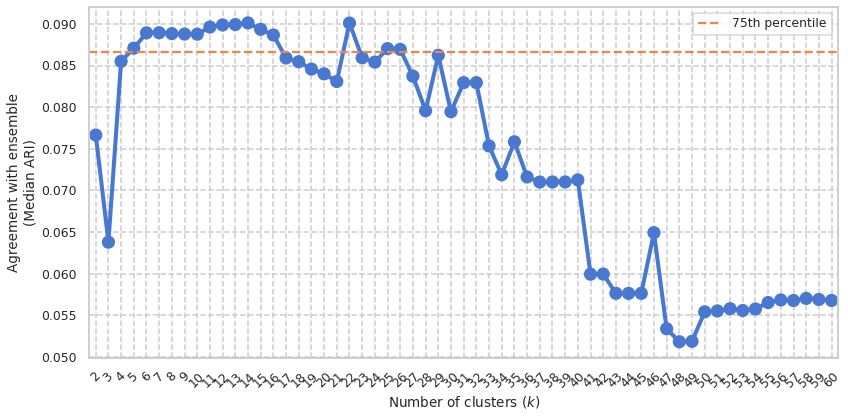

In [24]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average agreement value; partitions above that line are marked as selected for downstream analysis

In [25]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ari_median,selected
12,5,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, ...",0.087086,True
7,6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088920,True
6,7,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088937,True
8,8,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088831,True
9,9,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088777,True
10,10,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.088763,True
4,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True
3,12,scc_025,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.089870,True
2,13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
0,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True


From the two evidence accumulation approaches (EAC) we are using, the spectral clustering based one does it better for almost all `k` values, whereas the hierarchical clustering based approach seems to do a little bit better for lower `k`.